* Calculus comes in handy for `optimization problems` that we face in deep learning, where we repeatedly update our paramters in order to decrease the loss function.
* Optimization addressses how to fit our models to training data, and calculus is its key prerequisite.

In [1]:
!pip install numpy
!pip install d2l --no-deps

In [2]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

## 1.1 Derivatives and Differentiation

* A *derivative* is the rate of change in a function with respects to changes in its arguments.
* Derivatives tell us how rapidly a loss function would increase or decrease were we to increase or decrease each parameter by an infinitesimally small amount.
* The derivative of a function $f$ at point $x$ is defined as:

$f'(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h}$
* The term $lim$ tells us what happens to the value of the expression as a specified variable appraoches a particular value.
* When $f'{(x)}$ exists, $f$ is said to be differentiable at $x$; and when $f'(x)$ exists for all $x$ on set like interval $[a,b]$, we say that $f$ is differentiable on this set.
* Let's develop a function $u = f(x) = 3x^2 - 4x$.

In [3]:
def f(x):
  return 3*x**2-4*x

* Setting $x=1$, we see that $\frac{f(x + h) - f(x)}{h}$ approaches 2 as $h$ approaches 0.

In [4]:
for h in 10.0**np.arange(-1,-6,-1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


* The following are derivatives of some common functions:
$\begin{align*}
\frac{d}{dx} C &= 0 \quad \text{for any constant } C \\
\frac{d}{dx} x^n &= nx^{n-1} \quad \text{for } n \neq 0 \\
\frac{d}{dx} e^x &= e^x \\
\frac{d}{dx} \ln x &= x^{-1}
\end{align*}$

*

* Functions composed from differentialbe functions are often themselves differentiable.
* The folowing are rules of differentiation when dealing with composition of any differential functions $f$ and $g$, and constant $C$.
$\begin{align*}
\frac{d}{dx} [C f(x)] &= C \frac{d}{dx} f(x) && \text{Constant Multiple Rule} \\
\frac{d}{dx} [f(x) + g(x)] &= \frac{d}{dx} f(x) + \frac{d}{dx} g(x) && \text{Sum Rule} \\
\frac{d}{dx} [f(x)g(x)] &= f(x) \frac{d}{dx} g(x) + g(x) \frac{d}{dx} f(x) && \text{Product Rule} \\
\frac{d}{dx} \left[ \frac{f(x)}{g(x)} \right] &= \frac{g(x) \frac{d}{dx} f(x) - f(x) \frac{d}{dx} g(x)}
{[g(x)]^2} && \text{Quotient Rule}
\end{align*}$

## 1.2 Visualizing Utilities

* We can visualize the slopes of functions using `matplotlib` library

In [5]:

def use_svg_display():
  """Use the svg format to display a plot in Jupyter"""
  backend_inline.set_matplotlib_formats('svg')


In [6]:
def set_figsize(figsize=(3.5,2.5)):
  """Set the figure size for matplotlib"""
  use_svg_display()
  d2l.plt.rcParams['figure.figsize'] = figsize

* The `set_axes` function can associate axes with properties, including labels,ranges and scales.

In [7]:
def set_axes(axes,xlabel,ylabel,xlim,ylim,xscale,yscale,legend):
  """Set the axes for matplotlib"""
  axes.set_xlabel(xlabel)
  axes.set_xscale(xscale)
  axes.set_xlim(xlim)
  if legend:
    axes.legend(legend)
  axes.grid()


In [13]:
##function to plot curves
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""

    def has_one_axis(X):
        # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]

    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]

    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)

    if axes is None:
        axes = d2l.plt.gca()

    axes.cla()

    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)

    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

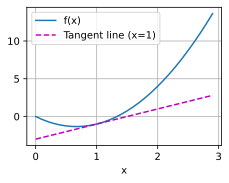

In [14]:
##plotting function u = f(x) and it's tangent line
## y= 2x-3 at x=1, where the coefficient 2 is the slope of the tangent
##line
import numpy as np
x = np.arange(0,3,0.1)
plot(x,[f(x),2*x-3],'x','f(x)',legend=['f(x)','Tangent line (x=1)'])

## 1.3 Partial derivatives and Gradients.

* We have dealt with differentiating functions of just one variable.
* In deep learning, we also work with functions of `many` variables.
* Let $y = f(x_1,x_2,.....x_n)$ be a function with $n$ variables. The partial derivative of y with respect to it's $i^{th}$ parameter $x_i$ is:
$\frac{\partial y}{\partial x_i} = \lim_{h \to 0} \frac{f(x_1, \dots, x_{i-1}, x_i + h, x_{i+1}, \dots, x_n) - f(x_1, \dots, x_i, \dots, x_n)}{h}
$

* To calculate $\frac{\partial y}{\partial x_i}$, we can treat $x_1,.....x_{i-1}....x_n$ as constants and calculate the derivatives of y with respect to $x_i$.
* The following notational conventions for partial derivatives are all common and all mean the same thing:
$
\frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = \partial_{x_i} f = \partial_i f = f_{x_i} = f_i = D_i f = D_{x_i} f
$
* We can concatenate partial derivatives of a multivariate function with respect to all its variables to obtain a vector that is called the `gradient` of the function.
* Suppose that the input function of the function $f: \mathbb{R}^n \to \mathbb{R}$ is an n-dimensional vector $x = [x_1,x_2,....x_n]^T$ and the output is a scalar. The gradient of the function $f$ with respect to $x$ is a vectot of n partial derivatives:
$
\nabla_{\mathbf{x}} f(\mathbf{x}) = \left[ \frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \dots, \frac{\partial f(\mathbf{x})}{\partial x_n} \right]^\top
$


* When there is no ambiguity $\nabla_{\mathbf{x}} f(\mathbf{x})$ is typically replaced by $\nabla f(\mathbf{x})$.
* The following rules are crucial in differentiating multivariate function:
   * For all $\mathbf{A} \in \mathbb{R}^{m \times n}$ we have $\nabla_{\mathbf{x}} \mathbf{Ax} = \mathbf{A}$ and $\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} = \mathbf{A}$.
   * For square matrices $\mathbf{A} \in \mathbb{R}^{m \times n}$ we have that $\nabla_{\mathbf{x}} (\mathbf{x}^\top \mathbf{A} \mathbf{x}) = (\mathbf{A} + \mathbf{A}^\top) \mathbf{x}$ and in particular $
   \nabla_{\mathbf{x}} \|\mathbf{x}\|^2 = \nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{x} = 2\mathbf{x}$.

* Similary, for any matrix X we have $\nabla_{\mathbf{X}} \|\mathbf{X}\|_F^2 = 2\mathbf{X}$

## 1.4 Chain Rule


* In deep learning, gradients of concern are often difficult to calculate because we are working with deeply nested functions.
* Fortunately, the chain rules takes care of this work.
* Based on single variable functions, suppose you have $y= f(g(x))$ and that the underlying functions $y=f(u)  
, u=g(x)$  are both differentiable.
* The chain rule states that:
  $\frac{dy}{dx} = \frac{\partial y}{\partial u} \frac{du}{dx}$

* Now turning to multivariable functions, suppose that $y= f(u)$ has variables $u_1,u_2,....u_n$ where each $u_i = g_i(x)$ has variablr $x_1,x_2,....,x_n$ i.e $u= g(x)$. Then the chain rule states that:
 $
 \frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial u_1} \frac{\partial u_1}{\partial x_i} + \frac{\partial y}{\partial u_2} \frac{\partial u_2}{\partial x_i} + \dots + \frac{\partial y}{\partial u_m} \frac{\partial u_m}{\partial x_i} \text{ and so } \nabla_{\mathbf{x}} y = \mathbf{A}^\top \nabla_{\mathbf{u}} y
 $

 * Where $\mathbf{A} \in \mathbb{R}^{n \times m}$ is a matrix that contains the derivative of a vector $u$ with respect to vector $x$.
 * Therefore evaluating the gradient requires computing a vector-matrix product.
